The project aimed to explore the billionaire class, with a focus on the industries in which they amassed their fortunes, the countries with the highest number of billionaires, and other intriguing facts.

I divided my analysis into several parts. The first part examined the general billionaire class. In the second part, I categorized billionaires by gender to identify any differences between male and female billionaires. The third part provided a closer examination of billionaires in the United States, while the fourth part focused on Chinese billionaires. In the final part, I compared various metrics between Chinese and US billionaires, resulting in some fascinating findings.

In [4]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
df = pd.read_csv('forbes_billionaires_2022.csv')

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2668 entries, 0 to 2667
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rank               2668 non-null   int64  
 1   personName         2668 non-null   object 
 2   age                2582 non-null   float64
 3   finalWorth         2668 non-null   int64  
 4   category           2668 non-null   object 
 5   source             2668 non-null   object 
 6   country            2655 non-null   object 
 7   state              748 non-null    object 
 8   city               2624 non-null   object 
 9   organization       352 non-null    object 
 10  selfMade           2668 non-null   bool   
 11  gender             2652 non-null   object 
 12  birthDate          2569 non-null   object 
 13  title              401 non-null    object 
 14  philanthropyScore  396 non-null    float64
 15  bio                2668 non-null   object 
 16  about              1562 

In [43]:
df.isna().sum()

rank                    0
personName              0
age                    86
finalWorth              0
category                0
source                  0
country                13
state                1920
city                   44
organization         2316
selfMade                0
gender                 16
birthDate              99
title                2267
philanthropyScore    2272
bio                     0
about                1106
dtype: int64

The 'forbes_billionaire_2022.csv' dataset contained 16 columns and 2668 rows, but four columns had over 1920 missing values. As filling these values was not feasible, the title, philanthropyScore, and about columns were dropped. The state column, which also had 1920 missing values, was retained for analysis of US billionaires to determine which states had the most billionaires. For the age column, missing values were filled with 'NA', and the same approach was applied to missing rows in the country, gender, city, and birthdate columns.

The dataset did not have any duplicates, but a minor issue was found in the source column. Hedge funds were written in two forms, hedge fund and hedge funds, which meant the program counted them as separate sources and could distort the analysis. To avoid this, hedge fund was changed to hedge funds.

In [8]:
df.duplicated().sum()

0

In [9]:
df['country']=df['country'].fillna('NA') 

In [10]:
df['state']=df['state'].fillna('NA')

In [11]:
df=df.drop(['organization','title','about'],axis=1)

In [12]:
df['city']= df['city'].fillna('NA') 

In [13]:
df['gender']= df['gender'].fillna('NA')

In [14]:
df['birthDate']= df['birthDate'].fillna('NA')

In [15]:
df['source'] = df['source'].replace('hedge fund','hedge funds')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2668 entries, 0 to 2667
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rank               2668 non-null   int64  
 1   personName         2668 non-null   object 
 2   age                2582 non-null   float64
 3   finalWorth         2668 non-null   int64  
 4   category           2668 non-null   object 
 5   source             2668 non-null   object 
 6   country            2668 non-null   object 
 7   state              2668 non-null   object 
 8   city               2668 non-null   object 
 9   selfMade           2668 non-null   bool   
 10  gender             2668 non-null   object 
 11  birthDate          2668 non-null   object 
 12  philanthropyScore  396 non-null    float64
 13  bio                2668 non-null   object 
dtypes: bool(1), float64(2), int64(2), object(9)
memory usage: 273.7+ KB


# General Anaylsis

In [17]:
country=df.groupby('country')['personName'].count().reset_index()

In [18]:
country=country.rename(columns={'personName':'Num'})

In [19]:
top_countries=country.sort_values(by='Num',ascending=False).head(15)
top_countries

,country,Num
71,United States,748
15,China,571
29,India,159
24,Germany,112
70,United Kingdom,85
62,Switzerland,73
27,Hong Kong,68
55,Russia,65
9,Brazil,54
33,Italy,49


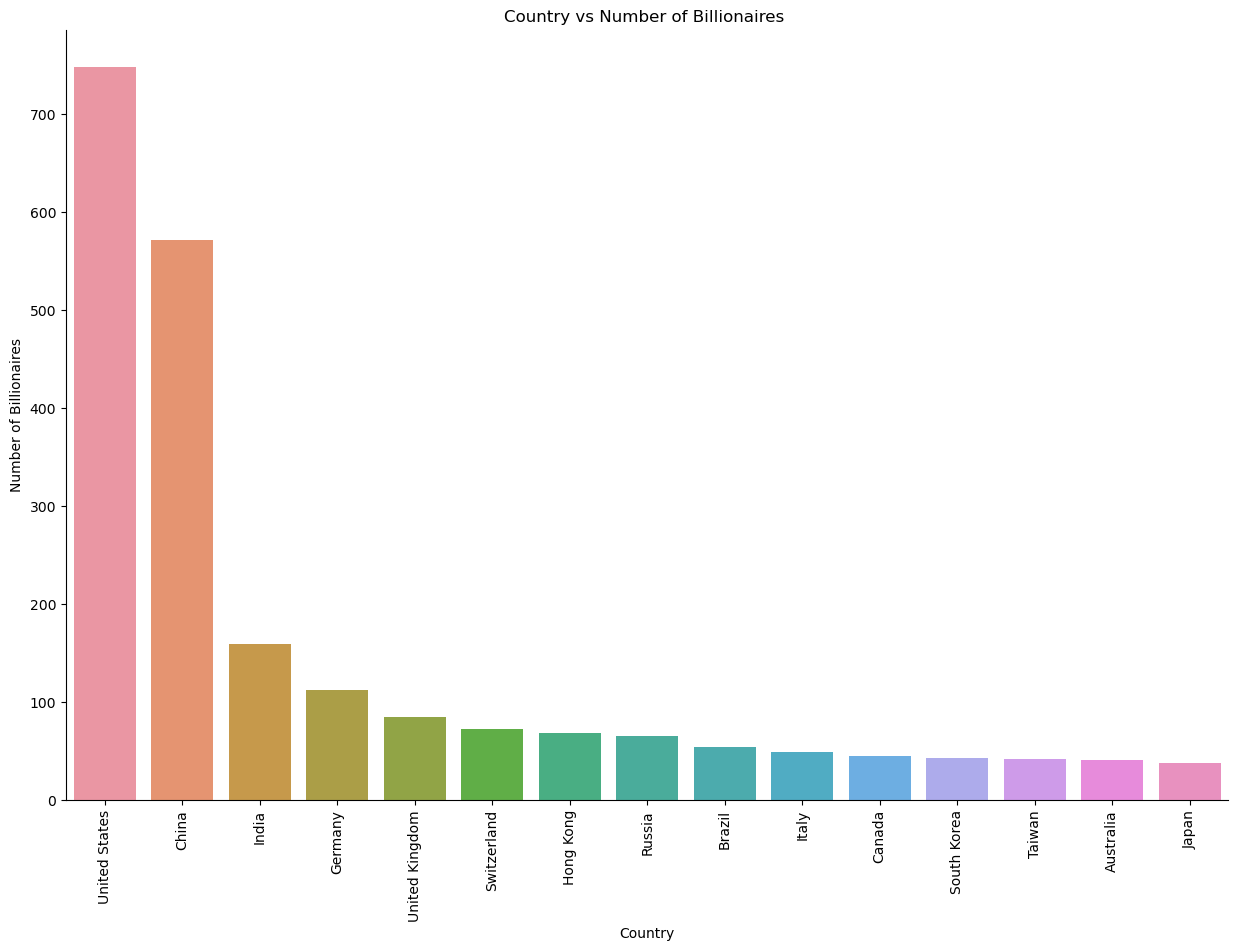

In [20]:
plt.figure(figsize=(15,10))
sns.barplot(x='country',data=top_countries,y='Num')
plt.xlabel('Country')
plt.ylabel('Number of Billionaires')
plt.title('Country vs Number of Billionaires ')
plt.xticks(rotation=90)
sns.despine()
plt.show()

The graph presents data on the distribution of billionaires across countries. As shown, the United States has the highest number of billionaires, with China coming in a close second. India is ranked third, with a total of 159 billionaires. Germany and the UK complete the top five in terms of billionaire count.

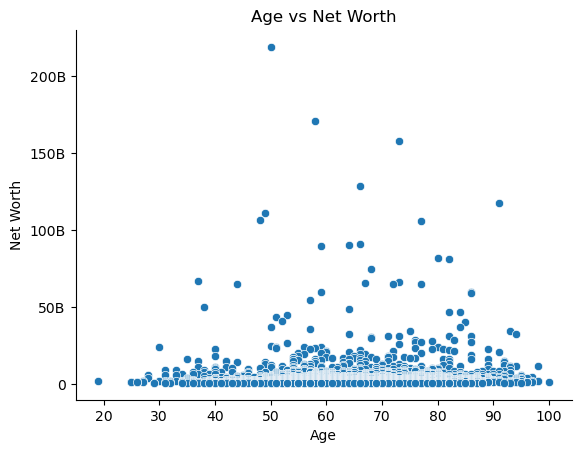

In [21]:
sns.scatterplot(x='age',y='finalWorth',data=df)
plt.title('Age vs Net Worth')
plt.ylabel('Net Worth')
plt.yticks([0,50000,100000,150000,200000],['0','50B','100B','150B','200B'])
sns.despine()
plt.xlabel('Age')
plt.show()

At first, I believed that older individuals in the dataset had higher net worths. Specifically, I hypothesized that there was a positive correlation between age and net worth, but my initial theory proved to be incorrect. Upon analysis, it was found that there is no significant correlation between age and net worth in the billionaire dataset. In fact, the correlation coefficient is weakly positive at 0.04.

In [22]:
df['age'].corr(df['finalWorth'])

0.04142297320579126

In [23]:
NetWorth=df.sort_values(by='finalWorth',ascending=False).head(10)
NetWorth

,rank,personName,age,finalWorth,category,source,country,state,city,selfMade,gender,birthDate,philanthropyScore,bio
0,1,Elon Musk,50.0,219000,Automotive,"Tesla, SpaceX",United States,Texas,Austin,True,M,6/28/1971,1.0,Elon Musk is working to revolutionize transpor...
1,2,Jeff Bezos,58.0,171000,Technology,Amazon,United States,Washington,Seattle,True,M,1/12/1964,1.0,Jeff Bezos founded e-commerce giant Amazon in ...
2,3,Bernard Arnault & family,73.0,158000,Fashion & Retail,LVMH,France,NA,Paris,False,M,3/5/1949,NaN,Bernard Arnault oversees the LVMH empire of so...
3,4,Bill Gates,66.0,129000,Technology,Microsoft,United States,Washington,Medina,True,M,10/28/1955,4.0,Bill Gates turned his fortune from software fi...
4,5,Warren Buffett,91.0,118000,Finance & Investments,Berkshire Hathaway,United States,Nebraska,Omaha,True,M,8/30/1930,5.0,"Known as the ""Oracle of Omaha,"" Warren Buffett..."
5,6,Larry Page,49.0,111000,Technology,Google,United States,California,Palo Alto,True,M,3/26/1973,1.0,"Larry Page stepped down as CEO of Alphabet, th..."
6,7,Sergey Brin,48.0,107000,Technology,Google,United States,California,Los Altos,True,M,8/21/1973,1.0,Sergey Brin stepped down as president of Alpha...
7,8,Larry Ellison,77.0,106000,Technology,software,United States,Hawaii,Lanai,True,M,8/17/1944,1.0,"Larry Ellison is chairman, chief technology of..."
8,9,Steve Ballmer,66.0,91400,Technology,Microsoft,United States,Washington,Hunts Point,True,M,3/24/1956,2.0,Steve Ballmer is the high-wattage former CEO o...
9,10,Mukesh Ambani,64.0,90700,Diversified,diversified,India,NA,Mumbai,False,M,4/19/1957,NaN,Mukesh Ambani chairs and runs $74 billion (rev...


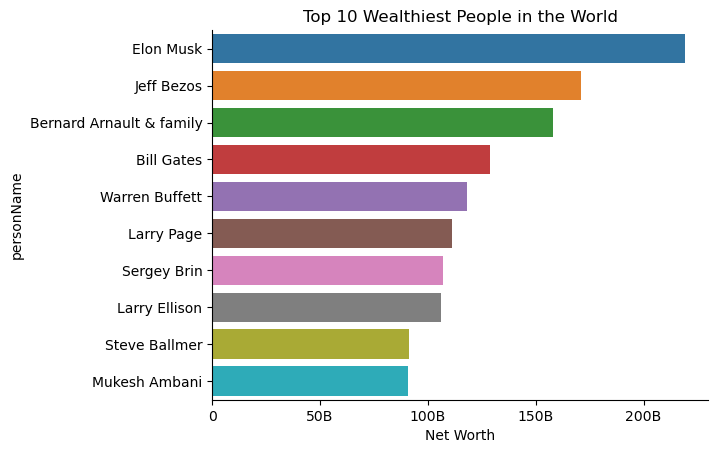

In [24]:
sns.barplot(y='personName',x='finalWorth',data=NetWorth)
sns.despine()
plt.xlabel('Net Worth')
plt.xticks([0,50000,100000,150000,200000],['0','50B','100B','150B','200B'])
plt.title('Top 10 Wealthiest People in the World')
plt.show()

According to recent reports, Elon Musk currently holds the title of the world's wealthiest individual, with Jeff Bezos, the founder of Amazon, and Bernard Arnault, the head of the LVMH empire, following closely behind. The remaining spots in the top five are occupied by Bill Gates, the co-founder of Microsoft, and Warren Buffet, widely regarded as one of the most successful investors in history.

In [25]:
industry = df.groupby('category')['personName'].count().reset_index()
industry

,category,personName
0,Automotive,70
1,Construction & Engineering,46
2,Diversified,180
3,Energy,95
4,Fashion & Retail,250
5,Finance & Investments,392
6,Food & Beverage,203
7,Gambling & Casinos,23
8,Healthcare,217
9,Logistics,35


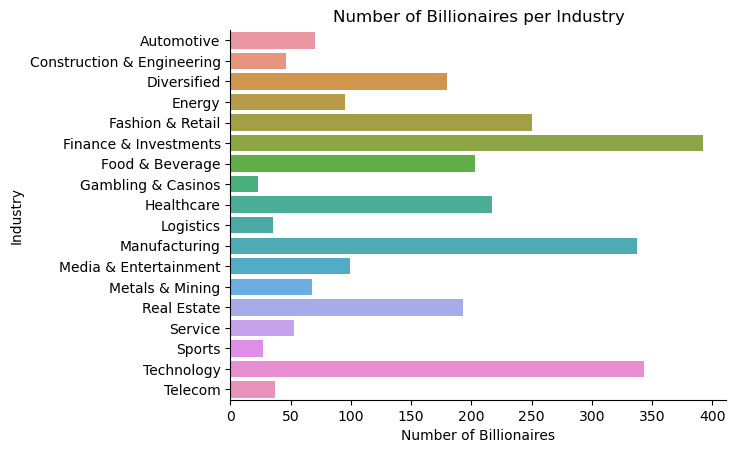

In [26]:
sns.barplot(y='category',x='personName',data=industry)
plt.title('Number of Billionaires per Industry')

plt.ylabel('Industry')
plt.xlabel('Number of Billionaires')
sns.despine()
plt.show()

Out of all the industries, the Finance and Investments sector produced the highest number of billionaires, with a total of 392 individuals on the list. The Technology industry followed closely behind with 343 billionaires, while the Manufacturing industry created 337 billionaires. Fashion & Retail and Healthcare rounded out the top five with 164 and 159 billionaires, respectively. If your goal is to become a billionaire, pursuing a career in one of these industries may not be a bad choice.

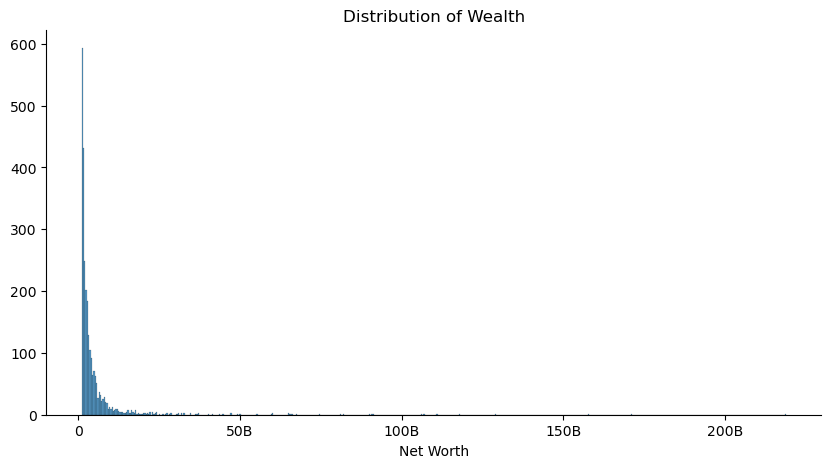

In [27]:
plt.figure(figsize=(10,5))
sns.histplot(x='finalWorth',data=df)
plt.title('Distribution of Wealth')
sns.despine()
plt.xticks([0,50000,100000,150000,200000],['0','50B','100B','150B','200B'])

plt.ylabel('')
plt.xlabel('Net Worth')
plt.show()

The graph displays the distribution of the net worth of billionaires in the dataset, which is noticeably right-skewed and contains a significant number of outliers.

The average net worth of billionaires in the dataset is estimated to be around 4.76 billion dollars, with a median of 2.4 billion dollars and a standard deviation of approximately 10.5 billion dollars. Additionally, the mode of the distribution is 1.5 billion dollars.

In [28]:
df['finalWorth'].mode()

0    1500
Name: finalWorth, dtype: int64

In [29]:
df['finalWorth'].describe()

count      2668.000000
mean       4762.350075
std       10540.482258
min        1000.000000
25%        1500.000000
50%        2400.000000
75%        4300.000000
max      219000.000000
Name: finalWorth, dtype: float64

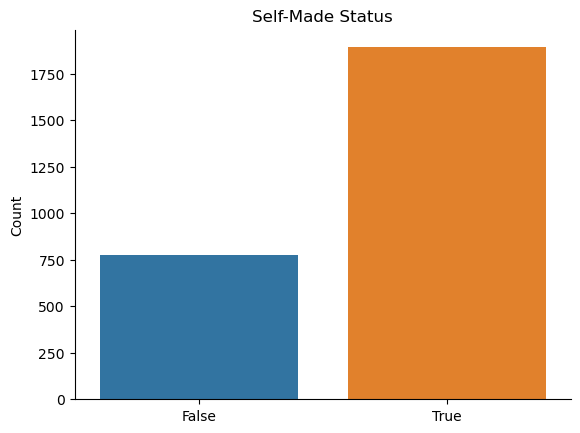

In [30]:
sns.countplot(x='selfMade',data=df)
plt.title('Self-Made Status')
sns.despine()
plt.ylabel('Count')
plt.xlabel('')
plt.show()

The graph provides a breakdown of the number of billionaires who are classified as self-made. Out of the 2,668 billionaires in the list, a majority of 1,891 individuals, or approximately 70.9%, are considered self-made. The remaining 777 billionaires, equivalent to 29.1% of the total, are not self-made.

In [31]:
self_status=df.groupby('selfMade')['finalWorth'].count().reset_index()
self_status

,selfMade,finalWorth
0,False,777
1,True,1891


In [32]:
self=df.groupby('selfMade')['finalWorth'].sum().reset_index()
self

,selfMade,finalWorth
0,False,3993400
1,True,8712550


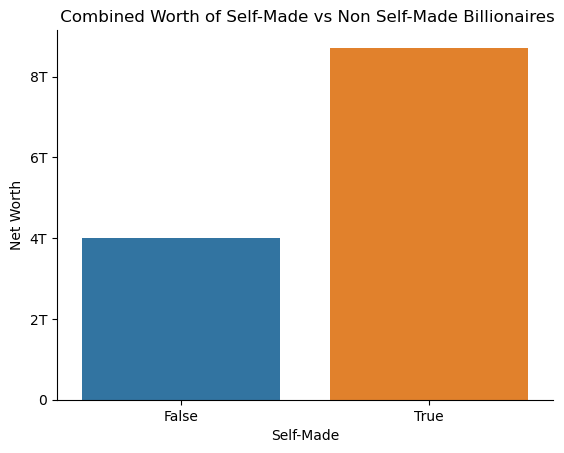

In [33]:
sns.barplot(x='selfMade',y='finalWorth',data=self)
plt.yticks([0,2000000,4000000,6000000,8000000],['0','2T','4T','6T','8T'])
plt.title(' Combined Worth of Self-Made vs Non Self-Made Billionaires')
sns.despine()
plt.xlabel("Self-Made")
plt.ylabel('Net Worth')
plt.show()

The total net worth of all self-made billionaires in the dataset is approximately 8.7 trillion dollars, whereas the net worth of all non self-made billionaires is close to 4 trillion dollars.

In [34]:
avg_country=df.groupby('country')['finalWorth'].mean().reset_index()
avg_country

,country,finalWorth
0,Algeria,5100.000000
1,Andorra,1300.000000
2,Argentina,2666.666667
3,Australia,4719.512195
4,Austria,5791.666667
...,...,...
69,United Arab Emirates,4000.000000
70,United Kingdom,4644.705882
71,United States,6354.946524
72,Uruguay,1633.333333


In [35]:
top_10_avg = avg_country.sort_values(by='finalWorth',ascending=False).head(10)
top_10_avg

,country,finalWorth
22,France,13370.588235
7,Belgium,12833.333333
39,Mexico,11292.857143
16,Colombia,9900.000000
46,Nigeria,9400.000000
5,Bahamas,9375.000000
71,United States,6354.946524
14,Chile,5950.000000
18,Denmark,5830.000000
4,Austria,5791.666667


In [36]:
median_country=df.groupby('country')['finalWorth'].agg(np.median).reset_index()
top_10_median=median_country.sort_values(by='finalWorth',ascending=False).head(10)
top_10_median

,country,finalWorth
16,Colombia,9900.0
18,Denmark,7700.0
46,Nigeria,7300.0
5,Bahamas,5650.0
20,Eswatini (Swaziland),5300.0
0,Algeria,5100.0
23,Georgia,4800.0
52,Portugal,4700.0
10,British Virgin Islands,4700.0
4,Austria,4000.0


In [37]:
plt.figure(figsize=(10,5))

sns.barplot(x='country',y='finalWorth',data=top_15_median)
plt.title('Top 10 Median Net Worth by Country')
plt.xticks(rotation=90)
plt.yticks([0,2000,4000,6000,8000,10000],['0','2B','4B','6B','8B','10B'])
plt.ylabel('Net Worth')
sns.despine()


plt.show()

NameError: name 'top_15_median' is not defined

<Figure size 1000x500 with 0 Axes>

The graph presents a list of the ten countries with the highest median net worth. Colombia tops the list with a median net worth of almost 10 billion dollars, followed by Denmark and Nigeria in second and third place, respectively. The median net worth was used to calculate these rankings, which helps to prevent the influence of outliers on the results.

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x='country',y='finalWorth',data=top_15_avg)
plt.title('Top 10 Average Net Worth by Country')
plt.xticks(rotation=90)
plt.yticks([0,2000,4000,6000,8000,10000,12000,14000],['0','2B','4B','6B','8B','10B','12B','14B'])
plt.ylabel('Net Worth')
sns.despine()
plt.tight_layout(pad=2)
plt.show()

The graph displays a list of the 10 countries with the highest average net worth of their billionaires. At the top of the list is France with an average net worth of approximately 13.4 billion dollars, followed by Belgium with around 12.8 billion dollars. Rounding out the top five are Mexico, Colombia, and Nigeria.

In [ ]:
ranges=[990,5000,10000,20000,40000,50000,100000,150000,220000]
labels=['1-5B','5-10B','10-20B','20-40B','40-50B','50-100B','100-150B','200B+']

df['NetWorth_bins']=pd.cut(df['finalWorth'],bins=ranges,labels=labels)

In [ ]:
NetWorth_bins=df.groupby('NetWorth_bins')['personName'].count().reset_index()


In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x='NetWorth_bins',y='personName',data=NetWorth_bins)
plt.title('Number of Billionaires by Category')
plt.ylabel('Count')
plt.xlabel('NetWorth-bins')
sns.despine()



plt.show()

According to the data, there are 2,117 billionaires in the list with a net worth between 1 and 5 billion dollars. Additionally, there are 355 billionaires with a net worth between 5 and 10 billion dollars, and so on.

Remarkably, only 8 billionaires in the dataset have a net worth exceeding 100 billion dollars.

In [ ]:
NetWorth_bins

In [ ]:
source_world=df.groupby('source')['personName'].count().reset_index()
source_world=source_world.sort_values(by='personName',ascending=False).head(10)

In [ ]:
sns.barplot(y='source',x='personName',data=source_world)
plt.title('Number of Billionaires by Source')
plt.ylabel('Source')
plt.xlabel('Count')
sns.despine()

The graph illustrates the different sources of wealth for billionaires. According to the data, 151 billionaires made their fortunes through real estate investments, while 94 billionaires generated their wealth through investments in various industries. The graph also shows other sources of billionaire wealth, such as finance, technology, and retail. 

In [ ]:
source_world

# Gender 

In [ ]:
gender=df.groupby(['gender','selfMade'])['rank'].count().reset_index()
gender

In [ ]:
gender_True = gender[gender['selfMade']==True]
gender_False = gender[gender['selfMade']==False]

In [ ]:
gender_False

In [ ]:
gender_data = gender_True.merge(gender_False,on='gender')

In [ ]:
gender_data

In [ ]:
gender_data['total']=gender_data['rank_x']+gender_data['rank_y']
gender_data

In [ ]:
gender_data['percent_selfMade']= round(gender_data['rank_x']/gender_data['total'],2)*100

In [ ]:
gender_data

In [ ]:
sns.barplot(x='gender',y='rank_x',data=gender_data,color='blue')
sns.barplot(x='gender',y='rank_y',data=gender_data,color='orange',bottom=gender_data['rank_x'])
plt.title('Self-Made vs Inherited')
plt.xlabel('Gender')
plt.ylabel('Count')




blue_patch = plt.Rectangle((0,0),1,1,fc='blue')
orange_patch = plt.Rectangle((0,0),1,1,fc='orange')
plt.legend([blue_patch,orange_patch],['Self-Made','Inherited'])


plt.show()

The graph displays the breakdown of self-made billionaires by gender. Among the 2,341 male billionaires in the dataset, 1,790 are self-made. In contrast, out of the 311 female billionaires, only 90 are self-made.

Interestingly, the majority of female billionaires inherited their wealth from their families, rather than building it themselves.

In [ ]:
gender_data=gender_data.drop(2)

In [ ]:
sns.barplot(x='gender',y='percent_selfMade',data=gender_data)
plt.title('Percentage of Self Made billionaires by Gender')
plt.xlabel('Gender')
plt.ylabel('')
sns.despine()
plt.yticks([0,10,20,30,40,50,60,70],['0','10%','20%','30%','40%','50%','60%','70%'])
plt.show()

The data indicates that roughly 29% of female billionaires are self-made, whereas about 76% of male billionaires are self-made. This suggests that there may be significant differences in the factors that contribute to wealth accumulation between genders.

In [ ]:
sns.boxplot(y='gender',x='finalWorth',data=df,whis=1.5)
sns.despine()
plt.title('Distribution of Wealth by Gender')
plt.xticks([0,50000,100000,150000,200000],['0','50B','100B','150B','200B'])
plt.ylabel('Gender')
plt.xlabel('Net Worth')
plt.show()

This graph depicts the distribution of net worth among billionaires by gender. The male distribution has a higher number of outliers compared to the female distribution. Interestingly, the average net worth amount is nearly the same for both genders. However, the female distribution has a slightly greater interquartile range, indicating a slightly greater spread in the middle values, while the male distribution has a greater standard deviation in net worth amounts.

Moreover, the median net worth for female billionaires is greater than that of male billionaires, at $2.5 billion compared to $2.3 billion, respectively. The range of the male distribution is 218 billion dollars (from 1 billion to 219 billion), while the range of the female distribution is 73.8 billion dollars (from 1 billion to 74.8 billion). Therefore, the range of net worth is almost three times higher for male billionaires than for female billionaires.

In [ ]:
female = df[df['gender']=='F']
male = df[df['gender']=='M']

In [ ]:
female['finalWorth'].describe() 

In [ ]:
male['finalWorth'].describe()

In [ ]:
Female = df[df['gender']=='F']

In [ ]:
F_source=Female.groupby('source')['personName'].count().reset_index()
F_source=F_source.sort_values(by='personName',ascending=False).head(10)
F_source

In [ ]:
sns.barplot(x='personName',y='source',data=F_source)
plt.title('Number of  Female Billionaires  by Source')
plt.ylabel('Source')
plt.xlabel('Count')
sns.despine()

Real estate produced the most number of female billionaires in the world. Pharmaceuticals created 14 female billionaires, while 12 female billionaires made their fortune from various other sources.

In [ ]:
top_10_Female = Female.sort_values(by='finalWorth',ascending=False).head(10)
top_10_Female

In [ ]:
sns.barplot(x='personName',y='finalWorth',data=top_10_Female)
plt.title('Wealthiest Female billionaires')
plt.ylabel('Net Worth')
plt.xlabel('Count')
plt.xticks(rotation=90)
plt.yticks([0,10000,20000,30000,40000,50000,60000,70000],['0','10B','20B','30B','40B','50B','60B','70B'])
sns.despine()

The graph shows the top 10 richest female billionaires in the world. The wealthiest female billionaire is Francois Bettencourt Meyers with a net worth of approximately 75 billion dollars, followed by Alice Walton with a net worth of around 65 billion dollars.

In [ ]:
selfmade_yes=Female[Female['selfMade']==True]
selfmade_no=Female[Female['selfMade']==False]

In [ ]:
top_self_made=selfmade_yes.sort_values(by='finalWorth',ascending=False).head(10)
top_self_made

In [ ]:
top_notself_made=selfmade_no.sort_values(by='finalWorth',ascending=False).head(10)
top_notself_made

In [ ]:
plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
sns.barplot(x='personName',y='finalWorth',data=top_self_made)
plt.title('Wealthiest Female Self-Made Billionaires ')
plt.ylabel('Net Worth')
plt.xlabel('Count')
plt.xticks(rotation=90)
sns.despine()
plt.yticks([0,2500,5000,7500,10000,12500,15000,17500],[0,'2.5B','5B','7.5B','10B','12.5B','15B','17B'])
plt.show()

According to the data, Fan Hongwei is the richest self-made billionaire with a net worth of around 18 billion dollars. Wu Yajun ranks second on the list with approximately 15 billion dollars in net worth.

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(x='personName',y='finalWorth',data=top_notself_made)
plt.title('Wealthiest Female Non Self-Made Billionaires ')
plt.ylabel('Net Worth')
plt.xlabel('Count')
plt.xticks(rotation=90)
plt.yticks([0,10000,20000,30000,40000,50000,60000,70000],[0,'10B','20B','30B','40B','50B','60B','70B'])
sns.despine()
plt.show()

The top 10 wealthiest female non self-made billionaires are the wealthiest female billionaires in the world. These billionaires inherited a significant portion of their net worth. Additionally, there is a significant difference in net worth between the top 10 wealthiest non self-made female billionaires and the top 10 wealthiest self-made female billionaires, with the former group having a higher net worth

In [ ]:
source_gender=df.groupby(['source','gender'])['personName'].count().reset_index()
source_f =source_gender[source_gender['gender']=='F']
source_f
source_m =source_gender[source_gender['gender']=='M']
source_m

In [ ]:
merge=source_m.merge(source_f,on='source')
merge
merge_source=merge[merge['personName_y']>merge['personName_x']]
merge_source

In [ ]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.barplot(x='source',y='personName_y',data=merge_source)
plt.title('Number of Female Billionaires by Source')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.subplot(1,2,2)
sns.barplot(x='source',y='personName_x',data=merge_source)
plt.title('Number of Male Billionaires by Source')
plt.xticks(rotation=90)
plt.ylabel('Count')

plt.show()

I discovered 8 sources of wealth where female billionaires outnumber male billionaires. Cargill created 7 female billionaires and 5 male billionaires. Samsung generated 3 female billionaires and 1 male billionaires and so forth.

# USA

In [ ]:
usa=df[df['country']=='United States']

In [ ]:
top_10_us=usa.head(10)
top_10_us

In [ ]:
sns.barplot(x='personName',y='finalWorth',data=top_10_us)

plt.title('The Wealthiest Men in USA')
plt.xlabel('Name')
plt.ylabel('Net Worth')
plt.xticks(rotation=90)
sns.despine()
plt.yticks([0,50000,100000,150000,200000],['0','50B','100B','150B','200B'])
plt.show()

Based on the data , the wealthiest men in the US are Elon Musk with a net worth of 219 billion dollars, followed by Jeff Bezos with a net worth of 171 billion dollars. The top 5 wealthiest men are completed by Bill Gates, Warren Buffet, and Larry Page.

In [ ]:
sns.countplot(x='gender',data=usa)
plt.title('Number of Billionaires in the U.S by Gender')
plt.xlabel('Gender')
sns.despine()

plt.show()

Out of the total number of billionaires in the US, which is 744, only 88 of them are female. This means that male billionaires in the US make up about 88% of the total billionaire population, while female billionaires only make up approximately 12%.

In [ ]:
usa.groupby('gender')['state'].count()

In [ ]:
plt.figure(figsize=(10,8))
sns.histplot(x='finalWorth',data=usa)
plt.title('Distribution of Wealth in USA')
sns.despine()
plt.xlabel('Net Worth')
plt.xticks([0,50000,100000,150000,200000],['0','50B','100B','150B','200B'])
plt.show() 

The graph displays the distribution of net worth for all billionaires in the US, indicating a right-skewed distribution with a significant number of outliers. The average net worth of US billionaires is approximately 6.35 billion dollars, while the median net worth is 2.9 billion dollars. The standard deviation of the distribution is approximately 15.8 billion dollars, and the mode is 1.6 billion dollars. Furthermore, the interquartile range, or the spread of the middle 50% values, is 3.4 billion dollars.

In [ ]:
usa['finalWorth'].mode()

In [ ]:
usa['finalWorth'].describe()

In [ ]:
ranges=[990,5000,10000,20000,40000,50000,100000,150000,200000,250000]
label_bins=['1-5B','5-10B','10-20B','20-40B','40-50B','50-100B','100-150B','150-200B','200B+']

usa['NetWorth_bins']=pd.cut(usa['finalWorth'],bins=ranges,labels=label_bins)

In [ ]:
usa[['finalWorth','NetWorth_bins']]

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(x='NetWorth_bins',data=usa)
plt.title('Number of Billionaires in USA by Category')
plt.ylabel('Count')
plt.xlabel('NetWorth-bins')
sns.despine()

Within the US, the majority of billionaires (557) have a net worth between 1 and 5 billion dollars, followed by 129 billionaires with a net worth between 5 to 10 billion dollars. Additionally, the US is home to 7 individuals who have a net worth exceeding 100 billion dollars.

In [ ]:
usa.groupby('NetWorth_bins')['personName'].count()

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(y='state',data=usa)
plt.title('Number of Billionaires by State')
plt.ylabel('State')
plt.xlabel('Count')
sns.despine()


plt.show()

The graph displays the distribution of billionaires across different states in the US. California leads the list with 186 billionaires, followed by New York with 135 billionaires. The concentration of technology giants in California and the presence of the financial hub in New York City could be the main contributing factors for the high number of billionaires in these states.

In [ ]:
usa.groupby('state')['personName'].count()

In [ ]:
sns.countplot(y='category',data=usa)
plt.title('Number of US Billionaires by Industry')
plt.ylabel('Industry')
plt.xlabel('Count')
sns.despine()

According to the graph, the Finance and Investment industry has the highest number of US billionaires with 200 individuals. The Technology industry follows closely with 150 billionaires, while the Food and Beverage industry produced 66 billionaires.

In [ ]:
done=usa.groupby('category')['personName'].count().reset_index()
done

In [ ]:
industry_mean=usa.groupby('category')['finalWorth'].mean().reset_index()
industry_mean=industry_mean.sort_values(by='finalWorth',ascending=False).head(10)
industry_mean

In [ ]:
sns.barplot(y='finalWorth',x='category',data=industry_mean)
plt.title('Average US Net Worth by Industry')
plt.ylabel('Net Worth')
plt.xlabel('Industry')
plt.xticks(rotation=90)
plt.yticks([0,2500,5000,7500,10000,12500,15000,17500],['0','2.5B','5B','7.5B','10B','12.5B','15B','17.5B'])
sns.despine()

plt.show()

According to the available data, the average net worth of a billionaire in the automotive industry is approximately 18 billion dollars, while the average net worth of a billionaire who has diversified investments in various industries is around 10 billion dollars.

In [ ]:
industry_median=usa.groupby('category')['finalWorth'].median().reset_index()
industry_median=industry_median.sort_values(by='finalWorth',ascending=False).head(10)
industry_median

In [ ]:
sns.barplot(y='finalWorth',x='category',data=industry_median)
plt.title('Median US Net Worth by Industry')
plt.ylabel('Net Worth')
plt.xlabel('Industry')
plt.xticks(rotation=90)
plt.yticks([0,1000,2000,3000,4000],['0','1B','2B','3B','4B'])
sns.despine()

plt.show()

According to the data, the median net worth of a US billionaire in the logistics industry is 4.7 billion, while the median net worth of a US billionaire in the automotive industry is 3.2 billion. This is significantly smaller than the average net worth of a US billionaire in these industries. The difference in average and median net worth is mainly due to a few outliers such as Elon Musk, whose net worth is significantly higher than the rest of the billionaires in the automotive industry.

In [ ]:
source=usa.groupby('source')['personName'].count().reset_index()
source=source.sort_values(by='personName',ascending=False).head(10)
source

In [ ]:
sns.barplot(y='source',x='personName',data=source)
plt.title('Number of Billionaires in USA by Source')
plt.ylabel('Source')
plt.xlabel('Count')
sns.despine()

The data shows that the largest group of US billionaires, with 40 individuals, made their fortune in the hedge fund industry. Following closely behind, 35 billionaires generated their wealth through investments, while another 35 amassed their billions through private equity.

In [ ]:
usa.groupby('selfMade')['state'].count().reset_index()

In [ ]:
sns.countplot(x='selfMade',data=usa)
plt.title("Self-Made vs Non Self-Made US Billionaires ")
plt.ylabel('Count')
plt.xlabel('Self-Made')
sns.despine()
plt.show()

According to the available data, there are 550 self-made billionaires in the US while 198 billionaires inherited their fortune. This means that approximately 73.5% of the billionaires in the US are self-made, while the remaining 26.5% of the billionaires have inherited their wealth.

In [ ]:
usa_f= usa[usa['gender']=='F']
usa_f.head()

In [ ]:
usa_f.groupby('selfMade')['state'].count().reset_index

In [ ]:
sns.countplot(x='selfMade',data=usa_f)
plt.title(" Female Self-Made vs Non Self-Made US Billionaires ")
plt.ylabel('Count')
plt.xlabel('Self-Made')
sns.despine()
plt.show()

In the US, there are 67 female billionaires who did not make their own fortunes, and 21 who did. This means that around 76% of female billionaires in the US inherited their wealth, while approximately 24% are self-made

# China

In [ ]:
china=df[df['country']=='China']
china.head()

In [ ]:
top_10= china.sort_values(by='finalWorth',ascending=False).head(10)
top_10.head()

In [ ]:
sns.barplot(x='personName',y='finalWorth',data=top_10)
plt.title("China's Wealthiest Men")
plt.xlabel('Name')
plt.ylabel('Net Worth')
plt.xticks(rotation=90)
plt.yticks([0,10000,20000,30000,40000,50000,60000],['0','10B','20B','30B','40B','50B','60B'])
sns.despine()
plt.show()

According to the graph, the top 10 richest individuals in China are depicted, with Zhong Shanshan taking the lead as the wealthiest person in China, with a net worth of around 66 billion dollars.

In [ ]:
sns.countplot(y='category',data=china)
plt.title("Number of Chinese Billionaires by Industry")
plt.ylabel('Cateogry')
plt.xlabel('Net Worth')
plt.xticks(rotation=90)
sns.despine()

plt.show()

The graph depicts the number of Chinese billionaires by industry. The manufacturing industry generated approximately 160 Chinese billionaires, while the technology industry produced 88 billionaires in China.

In [ ]:
china.groupby('category')['state'].count()

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(x='finalWorth',data=china)
plt.xticks([0,10000,20000,30000,40000,50000,60000],['0','10B','20B','30B','40B','50B','60B'])
plt.xlabel('Net Worth')
plt.title('Wealth Distribution among Billionaires in China')
plt.show()

The graph illustrates the distribution of net worth among Chinese billionaires, which is right-skewed with a few extreme outliers. The range of the distribution is approximately 5.5 billion, indicating a large spread of wealth. The average net worth of Chinese billionaires is 3.76 billion, while the median is 1.9 billion. The interquartile range, which measures the spread of values around the median, is approximately 2.5 billion. 

In [ ]:
china['finalWorth'].describe()

In [ ]:
sns.countplot(x='gender',data=china)
plt.title("Number of Chinese Billionaires by Gender ")
plt.ylabel('Count')
plt.xlabel('Gender')

sns.despine()

The number of male billionaires in China is 517, whereas the number of female billionaires is 53. This indicates that approximately 90.7% of billionaires in China are male, and only about 9.3% are female.

In [ ]:
china.groupby('gender')['state'].count()

In [ ]:
sns.countplot(x='selfMade',data=china)
plt.title("Self-Made vs Non Self-Made Chinese Billionaires ")
plt.ylabel('Count')
plt.xlabel('Self-Made')
sns.despine()
plt.show()

In [ ]:
chin=china.groupby('selfMade')['gender'].count().reset_index()
chin

Self-made billionaires are much more common in China, with 553 having earned their fortunes through hard work, while only 18 billionaires inherited their wealth.

In [ ]:
city=china.groupby('city')['state'].count().reset_index()
city

In [ ]:
top_cities=city.sort_values(by='state',ascending=False).head(10)
top_cities

In [ ]:
sns.barplot(x='state',y='city',data=top_cities)
plt.title('Number of Billionaires by City')
plt.xlabel('Count')
plt.ylabel('City')
sns.despine()

plt.show() 

The graph represents the distribution of Chinese billionaires across different cities. Among all cities in China, Beijing has the highest number of billionaires, with a total of 83. Shanghai comes second with 61 billionaires, followed by Shenzhen with 59 billionaires.

In [ ]:
chin_f= china[china['gender']=='F']
chin_f

In [ ]:
sns.countplot(x='selfMade',data=chin_f)
plt.title('Number of Female Self-Made vs Non Self-Made in China')
plt.ylabel('Count')
plt.xlabel('Self-Made')
sns.despine()

plt.show()

 This graph shows that the majority of female Chinese billionaires (85%) are self-made, while only a small percentage (15%) inherited their wealth. Out of 53 female Chinese billionaires, 45 of them are self-made, meaning they built their wealth through their own efforts and entrepreneurship. This is a positive sign of progress for women in China, who have traditionally faced barriers to achieving economic success and financial independence.

In [ ]:
chin_f.groupby('selfMade')['state'].count()

In [ ]:
china_source=china.groupby('source')['state'].count().reset_index()
china_source= china_source.sort_values(by='state',ascending=False).head(10)
china_source 

In [ ]:
sns.barplot(y='source',x='state',data=china_source)
plt.title('Top 10 Sources that made Chinese Billionaires')
plt.xlabel('Source')
plt.ylabel('Count')
plt.xticks(rotation=90)
sns.despine()


plt.show()

The chart depicts the major sources of wealth for Chinese billionaires. The pharmaceutical industry is the leading source of wealth for 38 Chinese billionaires. Real estate follows closely behind with 37 billionaires, while 18 billionaires made their fortune in the chemical industry.

In [ ]:
china.head(5)

In [ ]:
ranges = [990,5000,10000,20000,30000,40000,50000,60000,70000]
labels=['1-5B','5-10B','10-20B','20-30B','30-40B','40-50','50-60B','60B+']

china['bins']= pd.cut(china['finalWorth'],bins=ranges,labels=labels)

In [ ]:
china[['finalWorth','bins']]

In [ ]:
china_bins=china.groupby('bins')['state'].count().reset_index()
china_bins

In [ ]:
sns.barplot(x='bins',y='state',data=china_bins)
plt.title('Number of Billionaires in China by Category')
plt.xlabel('Net Worth bins')
plt.ylabel('Count')
sns.despine()
plt.show()

In [ ]:
industry_avg = china.groupby('category')['finalWorth'].mean().reset_index()
industry_avg=industry_avg.sort_values(by='finalWorth',ascending=False).head(10)
industry_avg

In [ ]:
sns.barplot(y='finalWorth',x='category',data=industry_avg)
plt.xticks(rotation=90)
plt.ylabel('Net Worth')
plt.xlabel('Industry')
plt.title('Average Net Worth of Chinese Billionaires by Industry')
sns.despine()
plt.yticks([0,2000,4000,6000,8000],['0','2B','4B','6B','8B'])


plt.show()

According to the graph, the average net worth of Chinese billionaires varies by industry. The automotive industry has the highest average net worth at approximately 9 billion dollars, followed by the media and entertainment industry. Other industries with relatively high average net worths include real estate, diversified, and pharmaceuticals.

In [ ]:
industry_median = china.groupby('category')['finalWorth'].median().reset_index()
industry_median=industry_median.sort_values(by='finalWorth',ascending=False).head(10)
industry_median

In [ ]:
sns.barplot(y='finalWorth',x='category',data=industry_median)
plt.xticks(rotation=90)
plt.ylabel('Net Worth')
plt.xlabel('Industry')
plt.title('Median Net Worth of Chinese Billionaires by Industry')
sns.despine()
plt.yticks([0,1000,1500,2000,2500,3000,3500,4000],['0','1B','1.5B','2B','2.5B','3B','3.5B','4B'])

plt.show()

According to the data, the median net worth of a Chinese billionaire operating in the automotive industry is approximately 3.9 billion dollars, which is less than half of the average net worth for a Chinese billionaire in that industry. The finance and investment industry ranks second in this category with a median net worth of approximately 3.3 billion dollars.

# USA VS CHINA 

To compare the wealth of the top 10 richest men in China and the US, the data shows that the top 10 richest men in the US are wealthier than the top 10 richest men in China. While China has two billionaires worth more than 50 billion, the tenth richest man in the US, Mark Zuckerberg, is worth more than China's richest man, Zhong Shanshan. On average, American billionaires have a net worth of around 6.35 billion US dollars, while Chinese billionaires have an average net worth of roughly 3.76 billion US dollars.

In [ ]:
usa['finalWorth'].mean()

In [ ]:
china['finalWorth'].mean()

The gender proportions of billionaires in China and the US are very similar. Around 90.7% of Chinese billionaires are male, while approximately 9.3% are female. In the US, 88% of all billionaires are male and approximately 12% are female.

To summarize, while both China and the US have right-skewed wealth distributions with outliers, the US has a higher average net worth and a wider spread in its dataset than China. The median net worth in the US is also higher than in China, but the middle 50% of values are more tightly clustered around the median in China.

Both distributions are right skewed and contain a outliers. The US has a higher average net worth of 6.35 billion versus the 3.76 billions in China. The median in USA is 2.9 billion versus 1.9 B in China. The US has a much bigger standard deviation or spread in its dataset at 15.5 billion versus 5.5 billion in China. The spread of the middle 50% values in the US was 3.4B vs 2.5B in China. 

To clarify, the data suggests that in both China and the US, the majority of billionaires fall in the 1 to 5 billion dollar category. However, China has two individuals in the 40 to 50 billion dollar bin, which is the same as the US. In addition, China has one billionaire who is worth approximately 65 billion dollars. On the other hand, the US has 9 individuals in the 50 to 100 billion dollar bin, 5 individuals in the 100 to 150 billion dollar bin, and 2 individuals worth more than 150 billion dollars.

The Finance & Investments industry is the primary source of wealth for most billionaires in the US, whereas in China, the manufacturing industry is the most common industry for billionaires to accumulate their wealth. The technology industry is the second most prolific industry for billionaires in both countries. The US also has a significant number of billionaires in the Food & Beverage industry, while in China, the Health Care industry is the third most prominent source of billionaire wealth.

The top source of wealth for billionaires in China is the pharmaceutical industry, with the highest number of Chinese billionaires having made their fortune in this field. On the other hand, in the US, the hedge fund industry is the primary source of wealth for billionaires. Real estate is the second most common source of wealth in China, with 37 Chinese billionaires having made their fortune in this industry. In contrast, in the US, the second most common source of wealth is investment, followed by private equity. The third most common source of wealth in China is the chemical industry.

The majority of female billionaires in China are self-made, with 85% of them having earned their fortune through their own efforts, while only 8 inherited their wealth. On the other hand, in the US, the majority of female billionaires are non self-made, with 76% of them having inherited their wealth, and only 24% having made their own fortune.

Self-Made vs Non Self-Made Chinese Billionaires

In China 553 billionaires or about 96.85% are self-made. Only 3.15% or 18 billionaires inherited their fortune. 
In the US 550 billionaires or 73.5% are self-made, while about 26.5% of the billionaires inherited their fortune. 

Almost all of chinese billionaires earned their bilions,while only  about 74% of US billions earned their own money.

China has a bigger percentage of self-made billionaires than the US.

The vast majority of billionaires in China, around 96.85%, are self-made, with only a small percentage of 3.15% having inherited their wealth. In contrast, the US has 73.5% self-made billionaires, while 26.5% inherited their wealth. This means that almost all Chinese billionaires earned their fortunes through their own efforts, while in the US, only around 74% of billionaires are self-made. Therefore, China has a higher proportion of self-made billionaires than the US.

In [38]:
df['age'].mean()

64.21068938807126